In [4]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import tensorflow as tf

IMG_SIZE = (224, 224)   # we’ll reuse later
plt.rcParams["figure.figsize"] = (6, 4)

print("TensorFlow:", tf.__version__)
print("Project root:", Path(".").resolve())
print("Data folders exist?",
      Path("data/train/Tumor").exists(),
      Path("data/train/No Tumor").exists())


C:\Users\Bhavini\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Bhavini\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Bhavini\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. P

ImportError: cannot import name 'formatargspec' from 'inspect' (c:\Python313\Lib\inspect.py)

In [3]:
%pip install matplotlib pillow numpy tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata 


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip uninstall -y tensorflow tensorflow-intel keras keras-nightly keras-preprocessing
!pip install "tensorflow==2.17.*" matplotlib pillow numpy scikit-learn


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorflow_intel 2.18.0
Uninstalling tensorflow_intel-2.18.0:
  Successfully uninstalled tensorflow_intel-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/382.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/382.4 MB 5.6 MB/s eta 0:01:09
   ---------------------------------------- 1.6/382.4 MB 5.2 MB/s eta 0:01:13
   ---------------------------------------- 2.9/382.4 MB 5.4 MB/s eta 0:01:11
   ---------------------------------------- 3.9/382.4 MB 5.3 MB/s eta 0:01:11
    --------------------------------------- 5.8/382.4 MB 6.0 MB/s eta 0:01:04
    --------------------------------------- 7.3/382.4 MB 6.3 MB/s eta 0:01:00
    --------------------------------------- 8.7/382.4 MB 6.4 MB/s eta 0:00:59
   - -------------------------------------- 10.0/382.4 MB 6.

In [2]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import tensorflow as tf

IMG_SIZE = (224, 224)   # we’ll reuse later
plt.rcParams["figure.figsize"] = (6, 4)

print("TensorFlow:", tf.__version__)
print("Project root:", Path(".").resolve())
print("Data folders exist?",
      Path("data/train/Tumor").exists(),
      Path("data/train/No Tumor").exists())


TensorFlow: 2.17.1
Project root: C:\Users\Bhavini\Downloads\BrainTumorProject
Data folders exist? True True


In [3]:
from pathlib import Path

def count_images(base="data"):
    counts = {}
    for split in ["train", "val"]:
        for cname in ["Tumor", "No Tumor"]:
            p = Path(base)/split/cname
            n = len([x for x in p.glob("*") if x.suffix.lower() in (".png",".jpg",".jpeg")])
            counts[f"{split}/{cname}"] = n
    return counts

counts = count_images()
counts


{'train/Tumor': 124, 'train/No Tumor': 78, 'val/Tumor': 31, 'val/No Tumor': 20}

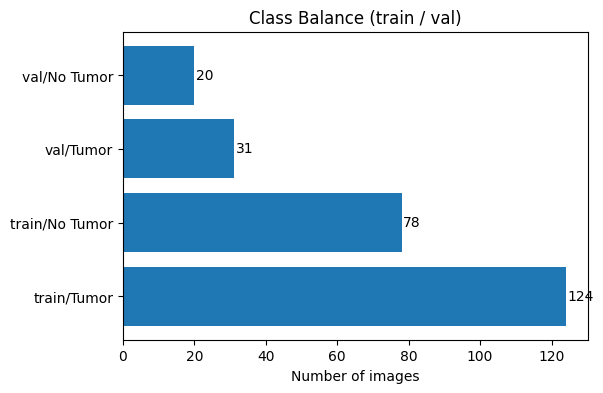

In [4]:
import matplotlib.pyplot as plt

labels = list(counts.keys())
values = [counts[k] for k in labels]

plt.figure()
plt.barh(labels, values)
plt.title("Class Balance (train / val)")
for i, v in enumerate(values):
    plt.text(v + 0.5, i, str(v), va="center")
plt.xlabel("Number of images")
plt.show()


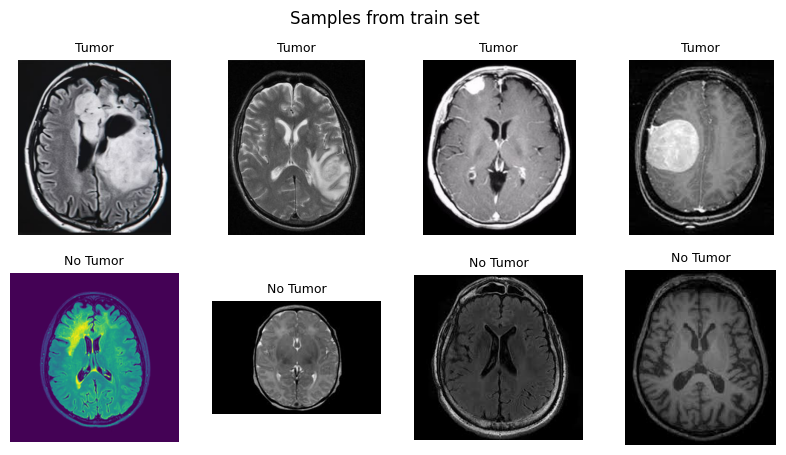

In [5]:
import random
from PIL import Image

def show_samples(split="train", n_per_class=4):
    rows, cols = 2, n_per_class
    plt.figure(figsize=(cols*2.5, rows*2.5)); i = 1
    for cname in ["Tumor", "No Tumor"]:
        folder = Path("data")/split/cname
        imgs = [p for p in folder.glob("*") if p.suffix.lower() in (".png",".jpg",".jpeg")]
        random.shuffle(imgs)
        for p in imgs[:n_per_class]:
            ax = plt.subplot(rows, cols, i)
            plt.imshow(Image.open(p)); plt.axis("off")
            ax.set_title(cname, fontsize=9); i += 1
    plt.suptitle(f"Samples from {split} set", y=0.98); plt.show()

show_samples("train", 4)


In [6]:
dims = []
for cname in ["Tumor", "No Tumor"]:
    folder = Path("data")/"train"/cname
    for p in list(folder.glob("*"))[:12]:
        if p.suffix.lower() in (".png",".jpg",".jpeg"):
            with Image.open(p) as im:
                dims.append(im.size)

print("First few sizes:", dims[:6])
print("Unique sizes:", len(set(dims)))


First few sizes: [(180, 218), (319, 360), (287, 348), (300, 336), (587, 630), (825, 993)]
Unique sizes: 22


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Normalization + light augmentation
data_augmentation = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
])
data_augmentation


<Sequential name=sequential, built=False>

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train", image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode="binary", shuffle=True
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/val", image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode="binary", shuffle=False
).prefetch(tf.data.AUTOTUNE)

CLASS_NAMES = train_ds.class_names
CLASS_NAMES


Found 202 files belonging to 2 classes.
Found 51 files belonging to 2 classes.


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [9]:
from pathlib import Path

def img_count(p): 
    return sum(1 for x in Path(p).glob("*") if x.suffix.lower() in (".png",".jpg",".jpeg"))

print("Exists?  data/train/Tumor   :", Path("data/train/Tumor").exists(), " count:", img_count("data/train/Tumor"))
print("Exists?  data/train/No Tumor:", Path("data/train/No Tumor").exists(), " count:", img_count("data/train/No Tumor"))
print("Exists?  data/val/Tumor     :", Path("data/val/Tumor").exists(),   " count:", img_count("data/val/Tumor"))
print("Exists?  data/val/No Tumor  :", Path("data/val/No Tumor").exists()," count:", img_count("data/val/No Tumor"))

# also confirm your working directory:
import os
print("\nCWD:", os.getcwd())
print("data subfolders:", os.listdir("data"))
print("train subfolders:", os.listdir("data/train"))
print("val subfolders:", os.listdir("data/val"))


Exists?  data/train/Tumor   : True  count: 124
Exists?  data/train/No Tumor: True  count: 78
Exists?  data/val/Tumor     : True  count: 31
Exists?  data/val/No Tumor  : True  count: 20

CWD: c:\Users\Bhavini\Downloads\BrainTumorProject
data subfolders: ['train', 'val']
train subfolders: ['No Tumor', 'Tumor']
val subfolders: ['No Tumor', 'Tumor']


In [10]:
SEED = 42
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train", image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode="binary", shuffle=True, seed=SEED
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/val", image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode="binary", shuffle=False
).prefetch(tf.data.AUTOTUNE)

CLASS_NAMES = train_ds.class_names
CLASS_NAMES


Found 202 files belonging to 2 classes.
Found 51 files belonging to 2 classes.


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [11]:
SEED = 42
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Build the raw datasets first (so we can read class_names)
train_raw = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=True,
    seed=SEED
)
val_raw = tf.keras.utils.image_dataset_from_directory(
    "data/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    shuffle=False
)

# Get class names BEFORE prefetch/map
CLASS_NAMES = train_raw.class_names
print("CLASS_NAMES:", CLASS_NAMES)

# Now add prefetch (and any map/augment) for performance
train_ds = train_raw.prefetch(tf.data.AUTOTUNE)
val_ds   = val_raw.prefetch(tf.data.AUTOTUNE)


Found 202 files belonging to 2 classes.
Found 51 files belonging to 2 classes.
CLASS_NAMES: ['No Tumor', 'Tumor']


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = (224, 224)

def build_simple_cnn():
    inputs = keras.Input(shape=IMG_SIZE + (3,))
    x = layers.Rescaling(1./255)(inputs)       # normalize
    x = layers.RandomFlip("horizontal")(x)     # light aug
    x = layers.RandomRotation(0.05)(x)
    x = layers.RandomZoom(0.05)(x)
    for f in [16, 32, 64]:
        x = layers.Conv2D(f, 3, padding="same", activation="relu")(x)
        x = layers.MaxPool2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

def build_mobilenet_v2():
    base = tf.keras.applications.MobileNetV2(
        input_shape=IMG_SIZE + (3,), include_top=False, weights="imagenet")
    base.trainable = False  # first pass: frozen
    inputs = keras.Input(shape=IMG_SIZE + (3,))
    x = layers.Rescaling(1./255)(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


In [13]:
import os

def count_images(path):
    exts = (".png",".jpg",".jpeg")
    c = 0
    for _,_,files in os.walk(path):
        c += len([f for f in files if f.lower().endswith(exts)])
    return c

n_neg = count_images("data/train/No Tumor")
n_pos = count_images("data/train/Tumor")
total = max(1, n_neg + n_pos)
class_weight = {0: total/(2*max(1, n_neg)), 1: total/(2*max(1, n_pos))}
class_weight


{0: 1.294871794871795, 1: 0.8145161290322581}

In [14]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1),
    keras.callbacks.ModelCheckpoint("checkpoint_best.keras", save_best_only=True, monitor="val_loss"),
]
callbacks


In [16]:
model_a = build_simple_cnn()
hist_a = model_a.fit(
    train_ds, validation_data=val_ds, epochs=8,
    callbacks=callbacks, class_weight=class_weight, verbose=1
)
model_a.save("model_a.keras")


Epoch 1/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.6782 - loss: 0.6158 - val_accuracy: 0.8039 - val_loss: 0.4930 - learning_rate: 0.0010
Epoch 2/8
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7525 - loss: 0.5442 - val_accuracy: 0.8824 - val_loss: 0.4130 - learning_rate: 5.0000e-04


In [17]:
from pathlib import Path
# if a saved model exists, load it; otherwise keep the in-memory one
if Path("model_a.keras").exists():
    from tensorflow import keras
    model_a = keras.models.load_model("model_a.keras")

# run 3 more epochs (adjust if you want)
hist_a_more = model_a.fit(
    train_ds, validation_data=val_ds,
    initial_epoch=2, epochs=5,   # runs epochs 3..5
    class_weight=class_weight, callbacks=None, verbose=1
)
model_a.save("model_a.keras")
print("Model A saved again.")


Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7673 - loss: 0.5211 - val_accuracy: 0.8431 - val_loss: 0.3942
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7624 - loss: 0.5119 - val_accuracy: 0.8431 - val_loss: 0.4113
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7723 - loss: 0.4958 - val_accuracy: 0.8824 - val_loss: 0.4271
Model A saved again.


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Make predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_prob = model_a.predict(val_ds).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Show metrics
print(classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"]))
print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
              precision    recall  f1-score   support

    No Tumor       0.94      0.75      0.83        20
       Tumor       0.86      0.97      0.91        31

    accuracy                           0.88        51
   macro avg       0.90      0.86      0.87        51
weighted avg       0.89      0.88      0.88        51

ROC-AUC Score: 0.9016129032258063


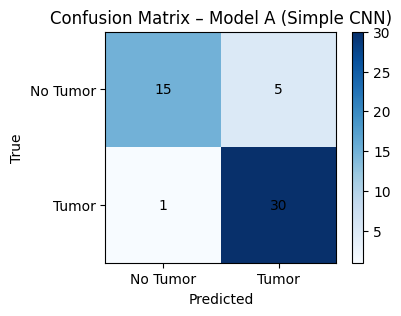

In [19]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 3))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix – Model A (Simple CNN)")
plt.colorbar()
plt.xticks([0, 1], ["No Tumor", "Tumor"])
plt.yticks([0, 1], ["No Tumor", "Tumor"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


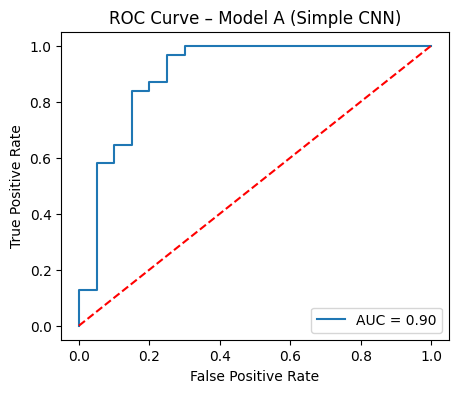

In [20]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_prob):.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Model A (Simple CNN)")
plt.legend(loc="lower right")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 4 vs 3

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
File "c:\Users\Bhavini\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever
File "c:\Users\Bhavini\anaconda3\Lib\asyncio\base_events.py", line 1986, in _run_once
File "c:\Users\Bhavini\anaconda3\Lib\asyncio\events.py", line 88, in _run
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
File "C:\Users\Bhavini\AppData\Local\Temp\ipykernel_27544\552314741.py", line 13, in <module>
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 588, in predict
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 282, in one_step_on_data_distributed
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 125, in wrapper
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 271, in one_step_on_data
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in predict_step
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 941, in __call__
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 59, in __call__
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 183, in call
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 206, in _run_through_graph
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 644, in call
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 941, in __call__
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 59, in __call__
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 250, in call
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 240, in convolution_op
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1350, in conv
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 338, in conv
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 326, in _conv_xla
File "c:\Users\Bhavini\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 313, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_10428[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[functional_1_1/conv2d_3_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_10480]

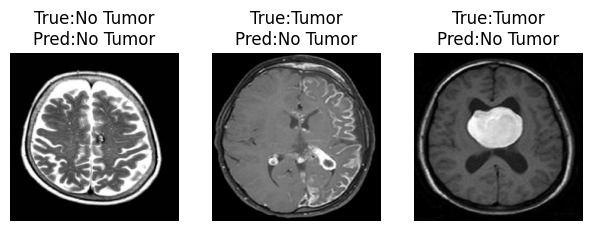

In [21]:
import random
from PIL import Image

# pick a few samples from val set
val_files = []
for f in Path("data/val/Tumor").glob("*"): val_files.append((f, 1))
for f in Path("data/val/No Tumor").glob("*"): val_files.append((f, 0))

sample = random.sample(val_files, 8)
plt.figure(figsize=(10, 5))
for i, (p, label) in enumerate(sample):
    img = Image.open(p).resize(IMG_SIZE)
    pred = model_a.predict(np.expand_dims(np.array(img)/255.0, 0))[0][0]
    pred_class = 1 if pred>=0.5 else 0
    ax = plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True:{CLASS_NAMES[int(label)]}\nPred:{CLASS_NAMES[pred_class]}")
plt.tight_layout()
plt.show()


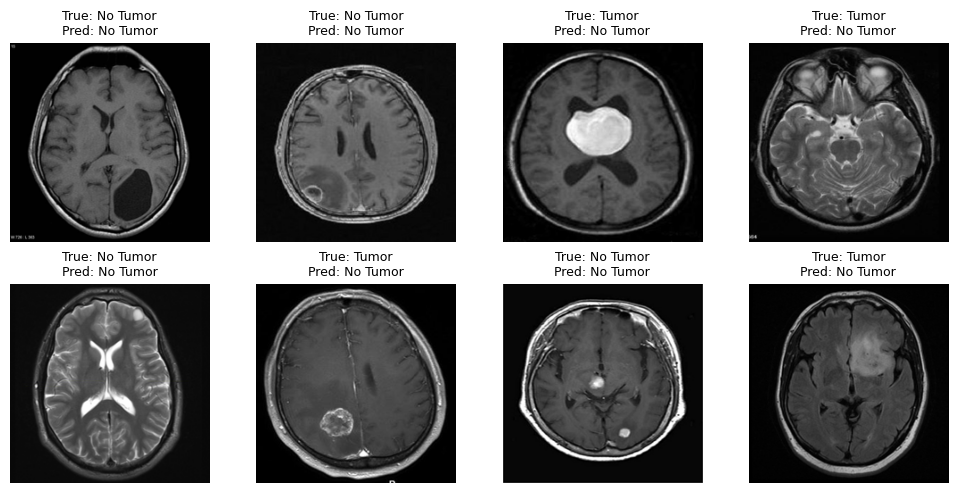

In [22]:
import random, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def predict_image(model, path, img_size=IMG_SIZE):
    # always RGB, right size, float32 in [0,1]
    img = Image.open(path).convert("RGB").resize(img_size)
    arr = np.asarray(img, dtype=np.float32) / 255.0
    arr = np.expand_dims(arr, 0)               # (1,H,W,3)
    # use eager prediction; avoids XLA / graph tracing quirks
    prob = float(model(arr, training=False).numpy().squeeze())
    return img, prob

# collect validation file paths with labels
val_files = []
val_files += [(p, 1) for p in Path("data/val/Tumor").glob("*")]
val_files += [(p, 0) for p in Path("data/val/No Tumor").glob("*")]

sample = random.sample(val_files, 8)

plt.figure(figsize=(10, 5))
for i, (p, true_lab) in enumerate(sample):
    img, prob = predict_image(model_a, p)
    pred_lab = 1 if prob >= 0.5 else 0

    ax = plt.subplot(2, 4, i+1)
    plt.imshow(img); plt.axis("off")
    title = f"True: {CLASS_NAMES[true_lab]}\nPred: {CLASS_NAMES[pred_lab]}"
    ax.set_title(title, fontsize=9)
plt.tight_layout(); plt.show()
